### Task 1: Importing libraries and Exploring the Dataset.

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project .

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

### Task 4: creat a model that fits the data

### Task 5: creating an accurecy table


###

### Task 1: Importing libraries and Exploring the Dataset.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from random import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



import scipy.stats as st
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

#Load Data

In [ ]:
data = pd.read_csv(r'breast-cancer - breast-cancer.csv')

#show
print(data.shape)

data.head()

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Task 2: Definining Exploratory Data Analysis with an overview of the whole project

In [ ]:
# Understand the nature of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

B    357
M    212
Name: diagnosis, dtype: int64


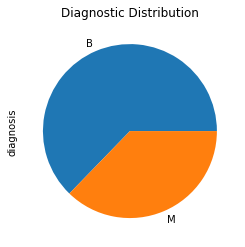

In [ ]:
#Distribution for diagnosis column
plt.title("Diagnostic Distribution")
C = data['diagnosis'].value_counts()
C.plot(kind='pie')
print(C)

#Feature Encoding


In [ ]:
#Label Encoder
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])
data['diagnosis'].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

#Feature Selection

['diagnosis' 'radius_mean' 'perimeter_mean' 'area_mean' 'compactness_mean'
 'concavity_mean' 'concave points_mean' 'radius_se' 'perimeter_se'
 'area_se' 'radius_worst' 'perimeter_worst' 'area_worst'
 'compactness_worst' 'concavity_worst' 'concave points_worst']


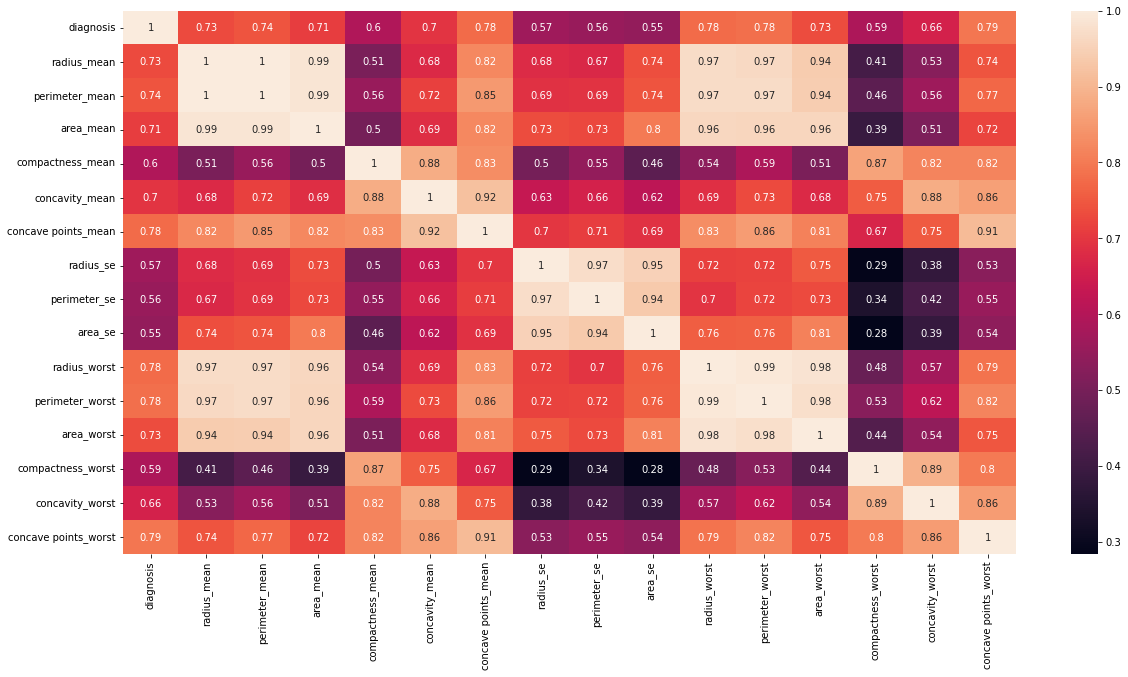

In [ ]:
#Get the correlation between the data
corr = data.corr()

# Top 50% Correlation training features with the diagnosis
top_feature = corr.index[abs(corr['diagnosis']) > 0.5]

# Top Features Affecting the Value of Diagnostics
print(top_feature.values)


#Dealing with high-quality features only
Important_Data =data[top_feature.values]

# plotting The Correlation as a heat map
plt.subplots(figsize=(20, 10))
top_corr = data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

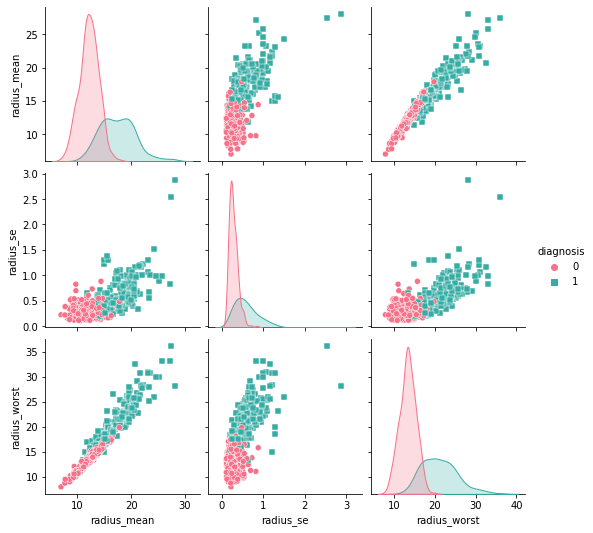

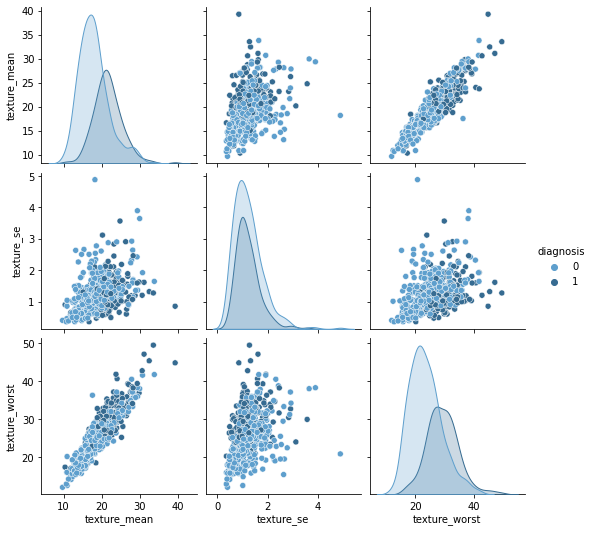

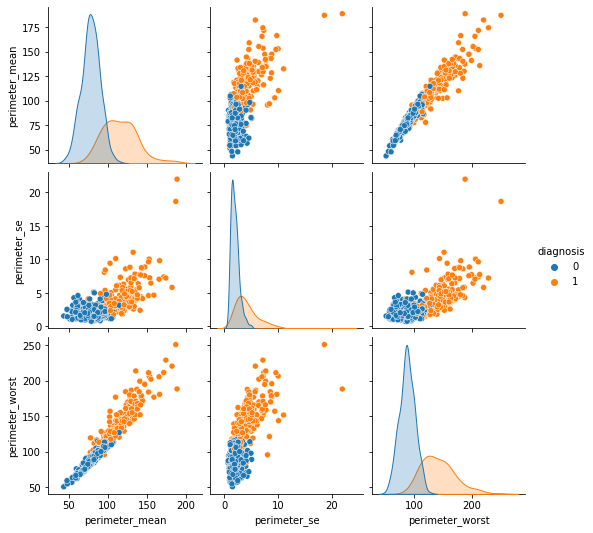

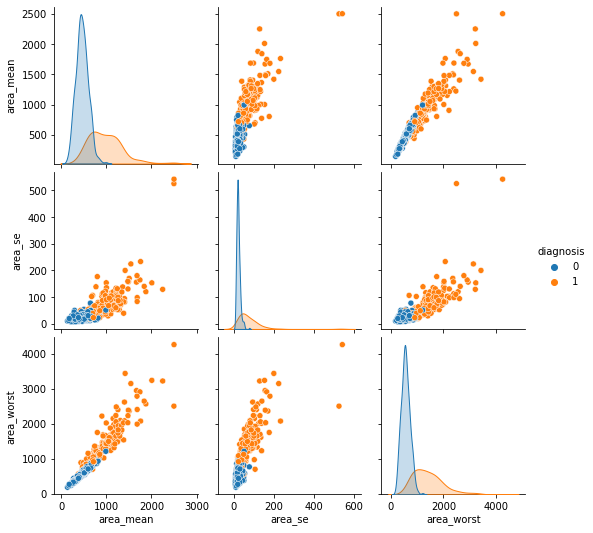

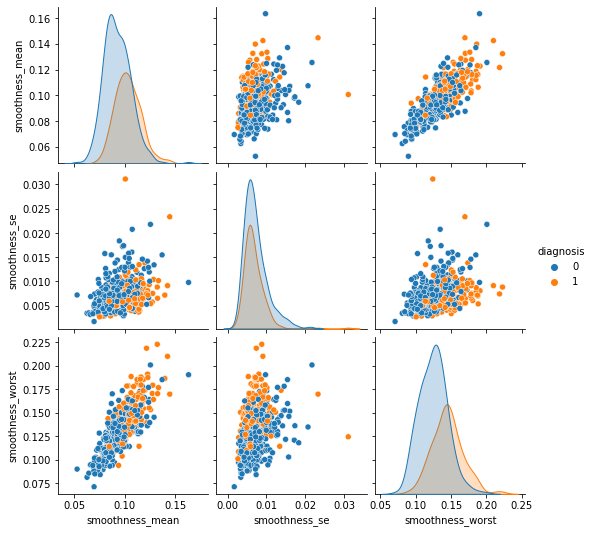

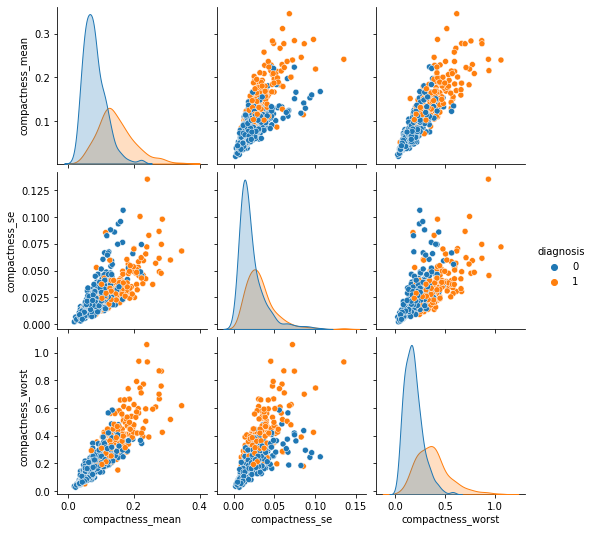

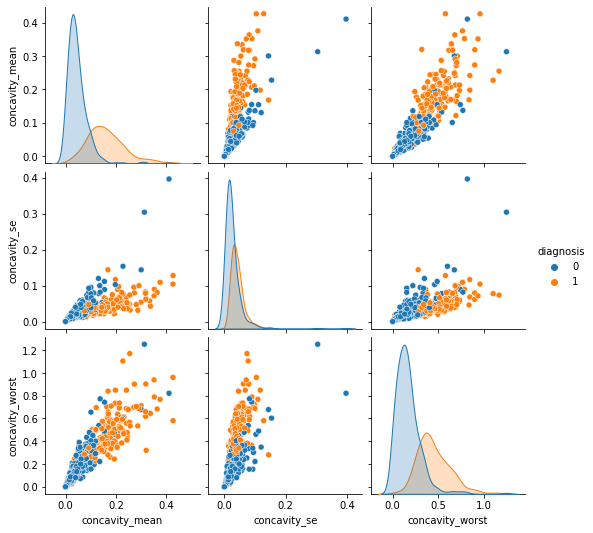

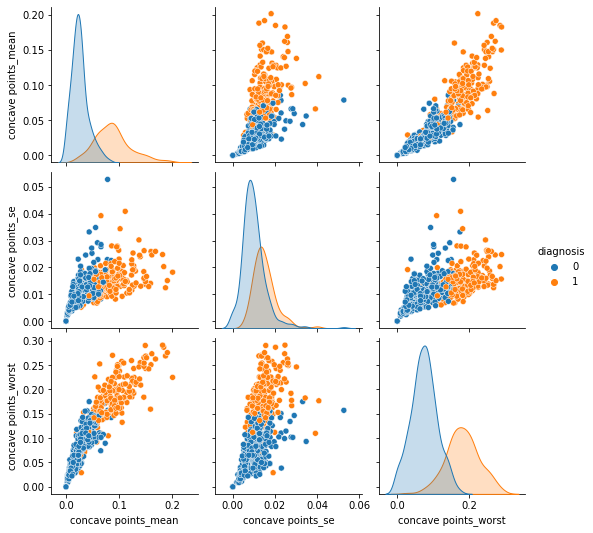

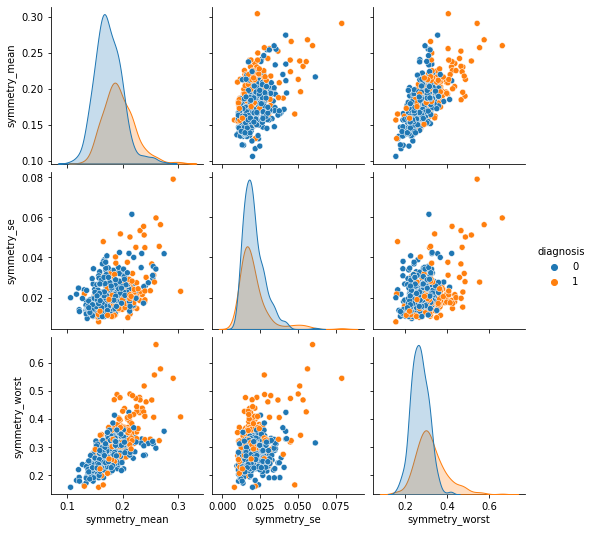

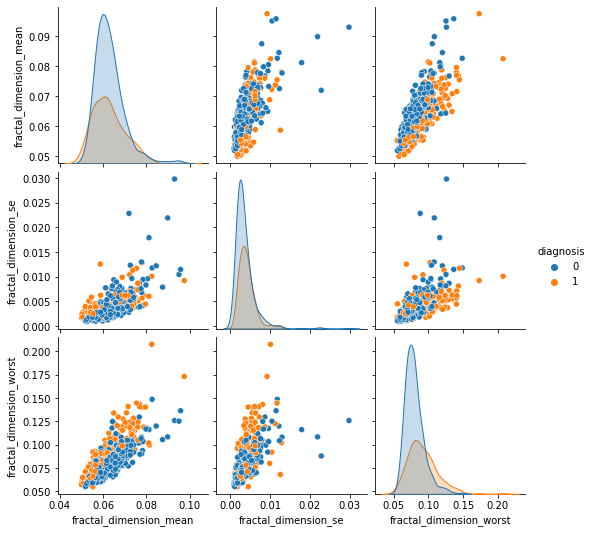

In [ ]:
radius = data[['radius_mean','radius_se','radius_worst','diagnosis']]
sns.pairplot(radius, hue='diagnosis',palette="husl", markers=["o", "s"])

texture = data[['texture_mean','texture_se','texture_worst','diagnosis']]
sns.pairplot(texture, hue='diagnosis', palette="Blues_d")

perimeter = data[['perimeter_mean','perimeter_se','perimeter_worst','diagnosis']]
sns.pairplot(perimeter, hue='diagnosis')

area = data[['area_mean','area_se','area_worst','diagnosis']]
sns.pairplot(area, hue='diagnosis')

smoothness = data[['smoothness_mean','smoothness_se','smoothness_worst','diagnosis']]
sns.pairplot(smoothness, hue='diagnosis')

compactness = data[['compactness_mean','compactness_se','compactness_worst','diagnosis']]
sns.pairplot(compactness, hue='diagnosis')

concavity = data[['concavity_mean','concavity_se','concavity_worst','diagnosis']]
sns.pairplot(concavity, hue='diagnosis')

concave_points = data[['concave points_mean','concave points_se','concave points_worst','diagnosis']]
sns.pairplot(concave_points, hue='diagnosis')

symmetry = data[['symmetry_mean','symmetry_se','symmetry_worst','diagnosis']]
sns.pairplot(symmetry, hue='diagnosis')

fractal_dimension = data[['fractal_dimension_mean','fractal_dimension_se','fractal_dimension_worst','diagnosis']]
sns.pairplot(fractal_dimension, hue='diagnosis')

#Handle important features only

In [ ]:
#Important_Data shape
print(Important_Data.shape)

#Get some stats for each column
Important_Data.describe()

(569, 16)


,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,91.969033,654.889104,0.104341,0.088799,0.048919,0.405172,2.866059,40.337079,16.269190,107.261213,880.583128,0.254265,0.272188,0.114606
std,0.483918,3.524049,24.298981,351.914129,0.052813,0.079720,0.038803,0.277313,2.021855,45.491006,4.833242,33.602542,569.356993,0.157336,0.208624,0.065732
min,0.000000,6.981000,43.790000,143.500000,0.019380,0.000000,0.000000,0.111500,0.757000,6.802000,7.930000,50.410000,185.200000,0.027290,0.000000,0.000000
25%,0.000000,11.700000,75.170000,420.300000,0.064920,0.029560,0.020310,0.232400,1.606000,17.850000,13.010000,84.110000,515.300000,0.147200,0.114500,0.064930
50%,0.000000,13.370000,86.240000,551.100000,0.092630,0.061540,0.033500,0.324200,2.287000,24.530000,14.970000,97.660000,686.500000,0.211900,0.226700,0.099930
75%,1.000000,15.780000,104.100000,782.700000,0.130400,0.130700,0.074000,0.478900,3.357000,45.190000,18.790000,125.400000,1084.000000,0.339100,0.382900,0.161400
max,1.000000,28.110000,188.500000,2501.000000,0.345400,0.426800,0.201200,2.873000,21.980000,542.200000,36.040000,251.200000,4254.000000,1.058000,1.252000,0.291000


#Data partitioning for training and testing

In [ ]:
#Divide data into X as training data and y as the label we want to predict
X = Important_Data.drop(['diagnosis'],axis = 1)
Y = Important_Data.diagnosis

#Remove Outliers


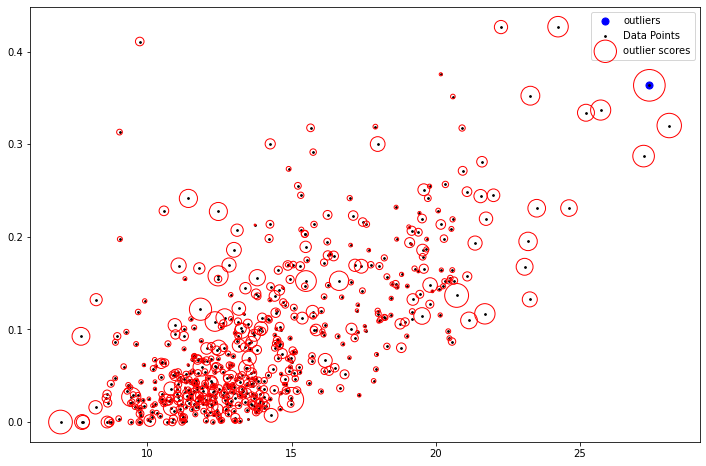

In [ ]:

columns= Important_Data.columns.tolist()
lof= LocalOutlierFactor()
y_pred=lof.fit_predict(X)
y_pred[0:30]

x_score= lof.negative_outlier_factor_
outlier_score= pd.DataFrame()
outlier_score["score"]=x_score

lofthreshold= -2.5
loffilter= outlier_score["score"]< lofthreshold
outlier_index= outlier_score[loffilter].index.tolist()


plt.figure(figsize=(12,8.))
plt.scatter(X.iloc[outlier_index,0],X.iloc[outlier_index,4],color="blue",s=50,label="outliers")
plt.scatter(X.iloc[:,0],X.iloc[:,4],color="k",s=3,label="Data Points")

radius=(x_score.max()- x_score)/(x_score.max()-x_score.min())
outlier_score["radius"]=radius
plt.scatter(X.iloc[:,0],X.iloc[:,4],s=1000*radius,edgecolors="r",facecolors="none",label="outlier scores")
plt.legend();


X= X.drop(outlier_index)
Y= Y.drop(outlier_index).values

In [ ]:
#Split the data to train and test the model
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

#Check dimensions
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x_train.head()

(454, 15)
(454,)
(114, 15)
(114,)


,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
407,12.85,82.63,514.5,0.08316,0.061260,0.01867,0.4993,2.552,41.24,14.40,91.63,645.8,0.19360,0.18380,0.05601
452,12.00,76.77,442.5,0.06450,0.040550,0.01945,0.1912,1.516,13.86,13.09,85.07,523.7,0.18560,0.18110,0.07116
381,11.04,70.67,372.7,0.07079,0.035460,0.02074,0.1642,1.281,11.68,12.09,79.73,447.1,0.19820,0.15530,0.06754
179,12.81,81.29,508.8,0.03774,0.009193,0.01330,0.2889,1.778,21.79,13.63,86.70,570.7,0.05445,0.02758,0.03990
567,20.60,140.10,1265.0,0.27700,0.351400,0.15200,0.7260,5.772,86.22,25.74,184.60,1821.0,0.86810,0.93870,0.26500


In [ ]:
#sns.pairplot(Important_Data,hue = 'diagnosis', palette='Blues')

#Feature Scaling

In [ ]:
# Scaling Features only , [We can not scale label values]
MM = StandardScaler()
x_train = MM.fit_transform(x_train)
x_test  = MM.fit_transform(x_test)

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

In [ ]:
#Check for Na Values
Important_Data.isna().sum()

diagnosis               0
radius_mean             0
perimeter_mean          0
area_mean               0
compactness_mean        0
concavity_mean          0
concave points_mean     0
radius_se               0
perimeter_se            0
area_se                 0
radius_worst            0
perimeter_worst         0
area_worst              0
compactness_worst       0
concavity_worst         0
concave points_worst    0
dtype: int64

### Task 4: creat a model that fits the data

#SVC Model [Linear Kernel]

In [ ]:
ACC=[]
TM=[]


SVC = SVC(kernel = 'linear', C = 0.01)
time1 = time.time()
SVC.fit(x_train , y_train)
time2 = time.time()

#Time
time_interval = time2 - time1
print("   Training Time    :" , time_interval ,"Seconds")

#Testing
y_predicted_svm = SVC.predict(x_test)
print("Testing accurency   :", metrics.accuracy_score(y_test, y_predicted_svm)*100 ,' %')

y_predicted_svm1 = SVC.predict(x_train)
print("Training accurency  :", metrics.accuracy_score(y_train, y_predicted_svm1)*100 ,' %')

ACC.append(metrics.accuracy_score(y_test, y_predicted_svm)*100)
TM.append(time_interval)

   Training Time    : 0.003251791000366211 Seconds
Testing accurency   : 92.10526315789474  %
Training accurency  : 93.6123348017621  %


#SVM Model [Poly Kernel]

In [ ]:
#Train the Model
time_1 = time.time()
clf = svm.SVC(kernel='poly', degree=4).fit(x_train, y_train)
time_2 = time.time()

#Time
time_interval = time_2 - time_1
print("   Training Time    :" , time_interval ,"Seconds")

#Testing
svm_predict = clf.predict(x_test)
print("Testing accurency   :", metrics.accuracy_score(y_test, svm_predict)*100 ,' %')

svm_predict1 = clf.predict(x_train)
print("Training accurency  :", metrics.accuracy_score(y_train, svm_predict1)*100 ,' %')

ACC.append(metrics.accuracy_score(y_test, svm_predict)*100)
TM.append(time_interval)

   Training Time    : 0.01205301284790039 Seconds
Testing accurency   : 78.0701754385965  %
Training accurency  : 83.48017621145375  %


#Decision Tree Model

In [ ]:
#Model
tree = DecisionTreeClassifier()

#Training
time_1 = time.time()
tree.fit(x_train, y_train)
time_2 = time.time()

#Time
time_interval = time_2 - time_1
print("      Training time                :" , time_interval , "Seconds")

#Testing
tree_predict = tree.predict(x_test)
print("Testing accurency of decision Tree :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")

tree_predict1 = tree.predict(x_train)
print("Training accurency decision Tree   :",metrics.accuracy_score(y_train, tree_predict1)*100, "%")

ACC.append(metrics.accuracy_score(y_test, tree_predict)*100)
TM.append(time_interval)

      Training time                : 0.005716085433959961 Seconds
Testing accurency of decision Tree : 90.35087719298247 %
Training accurency decision Tree   : 100.0 %


#Logistic Regression Model

In [ ]:
#Model
L = LogisticRegression(solver='saga', random_state=7)

#training
time_1 = time.time()
LG = L.fit(x_train, y_train)
time_2 = time.time()

#Time
time_interval = time_2 - time_1
print("  Training Time     :" , time_interval , "Seconds")

#Testing
lg_predict = LG.predict(x_test)
print("Testing accurency   :",metrics.accuracy_score(y_test, lg_predict)*100 , "%")

lg_predict1 = LG.predict(x_train)
print("Training accurency  :",metrics.accuracy_score(y_train, lg_predict1)*100 ,"%")

ACC.append(metrics.accuracy_score(y_test, lg_predict)*100)
TM.append(time_interval)

  Training Time     : 0.01488041877746582 Seconds
Testing accurency   : 93.85964912280701 %
Training accurency  : 95.59471365638767 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


#Random Forest Model

In [ ]:
#Model
RFC = RandomForestClassifier()

#Training
time_1 = time.time()
RF = RFC.fit(x_train,y_train)
time_2 = time.time()

#Time
time_interval = time_2 - time_1
print("  Training Time     :" , time_interval , "Seconds")

#Testing
rf_predict = RF.predict(x_test)
print("Testing accurency   :",metrics.accuracy_score(y_test, rf_predict)*100 , "%")

rf_predict1 = RF.predict(x_train)
print("Training accurency  :",metrics.accuracy_score(y_train, rf_predict1)*100 ,"%")


ACC.append(metrics.accuracy_score(y_test, rf_predict)*100)
TM.append(time_interval)

  Training Time     : 0.15908122062683105 Seconds
Testing accurency   : 95.6140350877193 %
Training accurency  : 100.0 %


#KNN Model

In [ ]:
#model
classfier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

#train
time1 = time.time()
classfier.fit(x_train, y_train)
time2 =time.time()

#Time
time_interval = time2 - time1
print("  Training Time     :" , time_interval , "Seconds")

#Testing
knn_predict = classfier.predict(x_test)
print("Testing accurency   :",metrics.accuracy_score(y_test, knn_predict)*100 , "%")

knn_predict1 = classfier.predict(x_train)
print("Training accurency  :",metrics.accuracy_score(y_train, knn_predict1)*100 ,"%")


ACC.append(metrics.accuracy_score(y_test, knn_predict)*100)
TM.append(time_interval)

  Training Time     : 0.0018589496612548828 Seconds
Testing accurency   : 92.98245614035088 %
Training accurency  : 95.59471365638767 %


#SVC Report

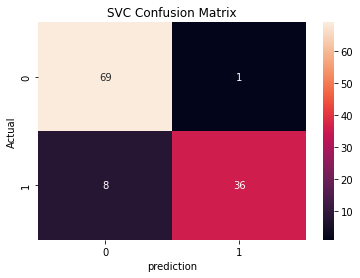

In [ ]:
cf0 = confusion_matrix(y_test,y_predicted_svm)
sns.heatmap(cf0,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('SVC Confusion Matrix')
plt.show()

In [ ]:
svc = classification_report(y_test,y_predicted_svm)
print(svc)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        70
           1       0.97      0.82      0.89        44

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114



### Task 5: creating an accurecy table

#SVM Report

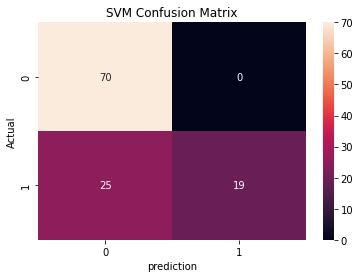

In [ ]:
cf = confusion_matrix(y_test,svm_predict)
sns.heatmap(cf,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

In [ ]:
SVM= classification_report(y_test,svm_predict)
print(SVM)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        70
           1       1.00      0.43      0.60        44

    accuracy                           0.78       114
   macro avg       0.87      0.72      0.73       114
weighted avg       0.84      0.78      0.75       114



#Decision Tree Report

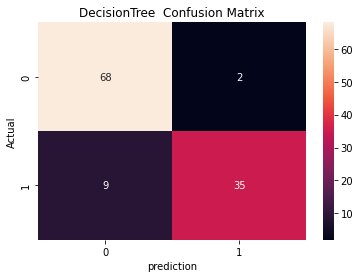

In [ ]:
cf1 = confusion_matrix(y_test, tree_predict)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('DecisionTree  Confusion Matrix')
plt.show()

In [ ]:
DT= classification_report(y_test,tree_predict)
print(DT)

              precision    recall  f1-score   support

           0       0.88      0.97      0.93        70
           1       0.95      0.80      0.86        44

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114



#Lodistic Regression Report

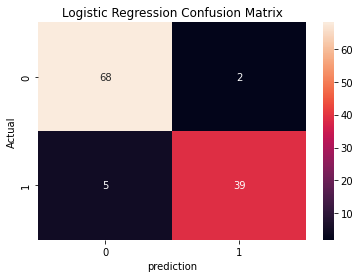

In [ ]:
cf2 = confusion_matrix(y_test, lg_predict)
sns.heatmap(cf2,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [ ]:
L= classification_report(y_test,lg_predict)
print(L)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        70
           1       0.95      0.89      0.92        44

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



#Random Forest Report

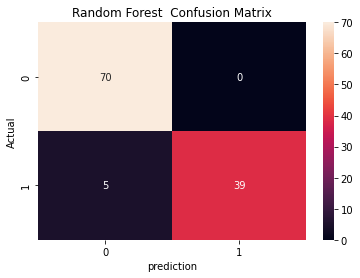

In [ ]:
cf3 = confusion_matrix(y_test, rf_predict)
sns.heatmap(cf3,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('Random Forest  Confusion Matrix')
plt.show()

In [ ]:
R= classification_report(y_test,rf_predict)
print(R)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        70
           1       1.00      0.89      0.94        44

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



#KNN Report

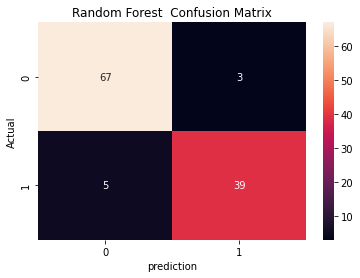

In [ ]:
cf4 = confusion_matrix(y_test, knn_predict)
sns.heatmap(cf4,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('Random Forest  Confusion Matrix')
plt.show()

In [ ]:
R= classification_report(y_test,knn_predict)
print(R)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        70
           1       0.93      0.89      0.91        44

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



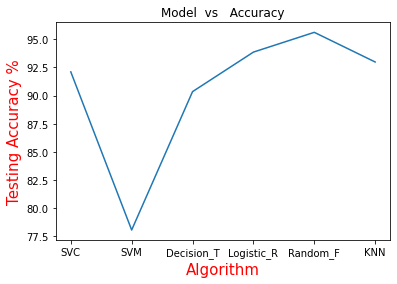

SVC :   92.10526315789474
SVM :   78.0701754385965
Decision_T :   90.35087719298247
Logistic_R :   93.85964912280701
Random_F :   95.6140350877193
KNN :   92.98245614035088


In [ ]:
Algo=['SVC','SVM','Decision_T','Logistic_R','Random_F','KNN']

plt.plot(Algo,ACC)
plt.title('Model  vs   Accuracy')
plt.xlabel('Algorithm',color ='r',fontsize=15)
plt.ylabel('Testing Accuracy %',color ='r',fontsize=15)
plt.show()

for i in range (0,len(Algo)):
  print(Algo[i], ":  ", ACC[i])

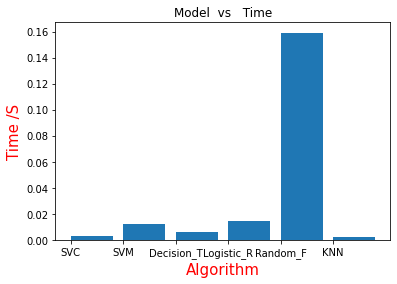

SVC :   0.003251791000366211
SVM :   0.01205301284790039
Decision_T :   0.005716085433959961
Logistic_R :   0.01488041877746582
Random_F :   0.15908122062683105
KNN :   0.0018589496612548828


In [ ]:
plt.bar(Algo,TM,align='edge')
plt.title('Model  vs   Time')
plt.xlabel('Algorithm',color ='r',fontsize=15)
plt.ylabel('Time /S',color ='r',fontsize=15)
plt.show()

for i in range (0,len(Algo)):
  print(Algo[i], ":  ", TM[i])